In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats
import math


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_iris

import statsmodels.api as sm

import pandas_datareader as pdr
from datetime import datetime
import requests
from io import StringIO


In [3]:
iris=load_iris()

In [5]:
x=iris.data
y=iris.target

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris_data=DataFrame(x,columns=['septal length','septal width','petal length','petal width'])

In [8]:
iris_target=DataFrame(y,columns=['species'])

In [11]:
def flower(num):
    if num == 0:
        return 'setosa'
    elif num ==1:
        return 'versicolour'
    else:
        return 'virginica'

In [12]:
iris_target['species']=iris_target['species'].apply(flower)

In [13]:
iris_target.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [14]:
iris=pd.concat([iris_data,iris_target],axis=1)

In [15]:
iris.head()

,septal length,septal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


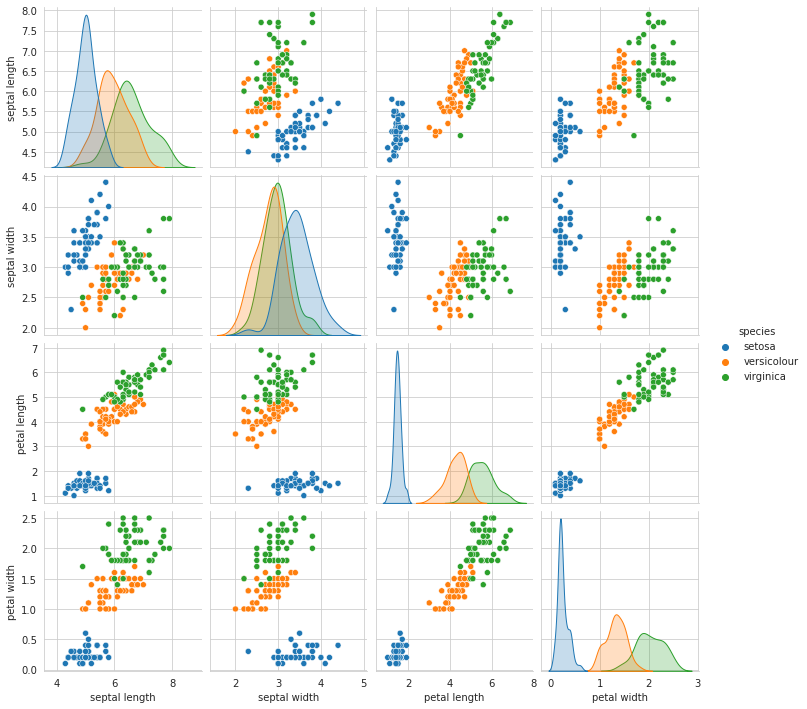

In [17]:
sns.pairplot(data=iris,hue='species')

<AxesSubplot:xlabel='petal length', ylabel='Count'>

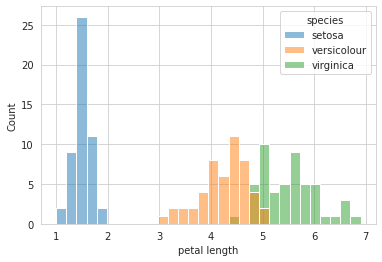

In [21]:
sns.histplot(x='petal length',data=iris, hue='species',bins=30)

<AxesSubplot:xlabel='petal width', ylabel='Count'>

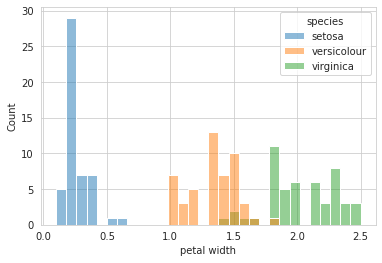

In [22]:
sns.histplot(x='petal width',data=iris, hue='species',bins=30)

<AxesSubplot:xlabel='petal length', ylabel='petal width'>

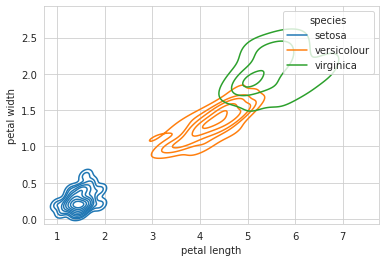

In [23]:
sns.kdeplot(x='petal length',y='petal width',data=iris,hue='species')

In [27]:
logreg=LogisticRegression(max_iter=500)
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.4,random_state=3)


In [28]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [29]:
ypred=logreg.predict(x_test)

In [30]:
print(metrics.accuracy_score(y_test,ypred))

0.9666666666666667


In [31]:
#lets use k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#youu can adjust k to improve your prediction score
knn=KNeighborsClassifier(n_neighbors=6)

In [33]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [34]:
ypredknn=knn.predict(x_test)

In [35]:
print(metrics.accuracy_score(y_test,ypredknn))

0.95


In [36]:
#lowering k to 1 improves our model
knn=KNeighborsClassifier(n_neighbors=1)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
ypredknn=knn.predict(x_test)

In [39]:
print(metrics.accuracy_score(y_test,ypredknn))

0.9666666666666667


In [40]:
#lets run a bunch and see the optimal k values
k_range=range(1,21)
accuracy=[]


In [41]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    ypredknn=knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,ypredknn))

Text(0, 0.5, 'test accuracy')

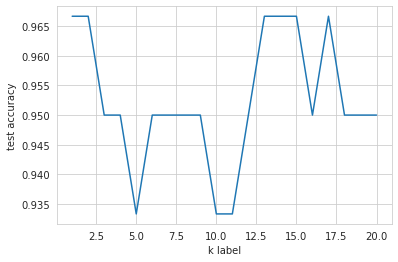

In [42]:
plt.plot(k_range,accuracy)
plt.xlabel("k label")
plt.ylabel('test accuracy')

In [ ]:
#looks like k=1 or k=13 are basically the best you can expect. Not much better than logistic regression in this case